In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from toomredf import toomredf

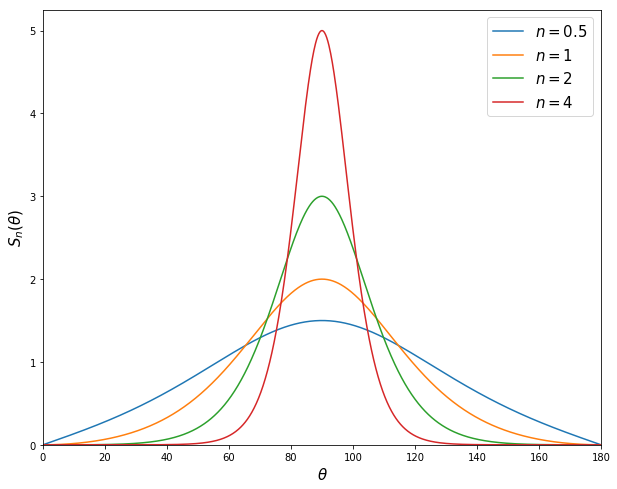

In [2]:
dfs = [toomredf(2**i) for i in range(-1,3)]
theta = np.linspace(0,180,1000)
plt.figure(figsize=(10,8))
for df in dfs:
    plt.plot(theta, df._S(np.radians(theta)), label=r'$n={}$'.format(df.n))
plt.xlim(0,180)
plt.ylim(0)
plt.xlabel(r'$\theta$', fontsize=15)
plt.ylabel(r'$S_{n}(\theta)$', fontsize=15)
plt.legend(fontsize=15)
plt.show()

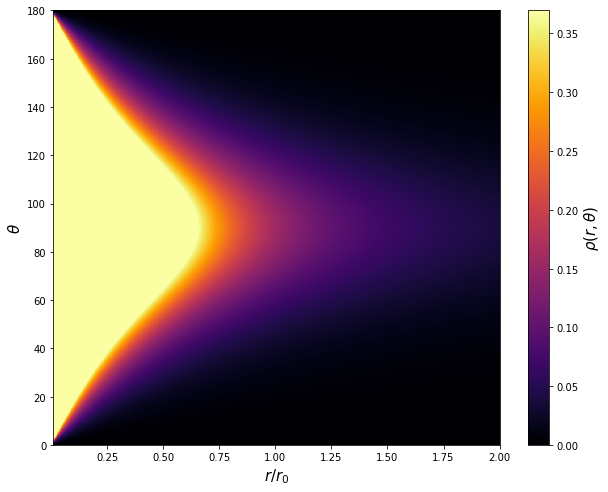

In [3]:
df = toomredf()
r = np.linspace(0.01,2,1000)
theta = np.linspace(0, np.pi, 1000)
rs, thetas = np.meshgrid(r, theta)
vals = df.density(rs, thetas)
plt.figure(figsize=(10,8))
plt.imshow(vals, cmap='inferno', aspect='auto', vmax=0.01*np.std(vals),
           extent=[np.min(r), np.max(r), np.min(np.degrees(theta)), np.max(np.degrees(theta))])
cbar = plt.colorbar()
cbar.set_label(r'$\rho(r, \theta)$', fontsize=15)
plt.xlabel(r'$r/r_{0}$', fontsize=15)
plt.ylabel(r'$\theta$', fontsize=15)
plt.show()

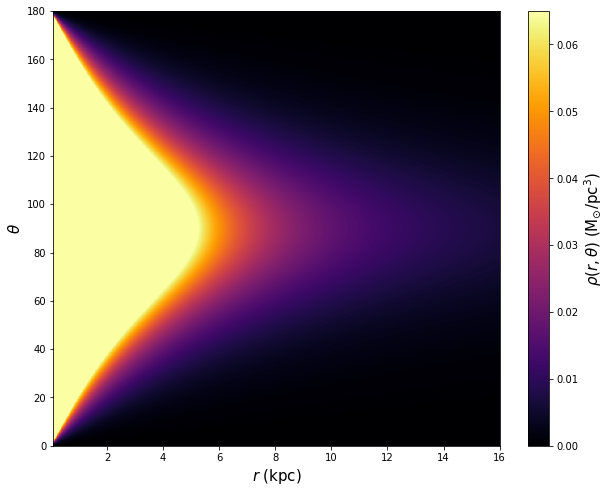

In [4]:
df = toomredf()
df.turn_physical_on()
r = np.linspace(0.01,2,1000)*8
theta = np.linspace(0, np.pi, 1000)
rs, thetas = np.meshgrid(r, theta)
vals = df.density(rs, thetas)
plt.figure(figsize=(10,8))
plt.imshow(vals, cmap='inferno', aspect='auto', vmax=0.01*np.std(vals),
           extent=[np.min(r), np.max(r), np.min(np.degrees(theta)), np.max(np.degrees(theta))])
cbar = plt.colorbar()
cbar.set_label(r'$\rho(r, \theta)$ $(\mathrm{M}_{\odot}/\mathrm{pc}^{3})$', fontsize=15,)
plt.xlabel(r'$r$ (kpc)', fontsize=15)
plt.ylabel(r'$\theta$', fontsize=15)
plt.show()

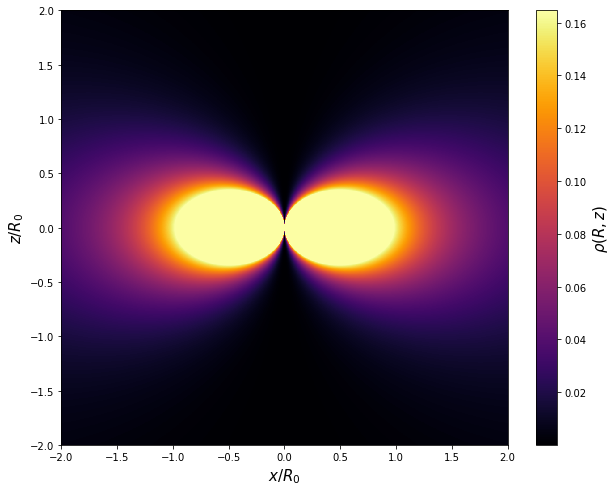

In [5]:
df = toomredf()
R = np.linspace(-2,2,1000)
z = np.linspace(-2,2,1000)
Rs, zs = np.meshgrid(R, z)
vals = df.density_cyl(Rs, zs)
plt.figure(figsize=(10,8))
plt.imshow(vals, cmap='inferno', aspect='auto', vmax=np.mean(vals)+0.001*np.std(vals),
           extent=[np.min(R), np.max(R), np.min(z), np.max(z)])
cbar = plt.colorbar()
cbar.set_label(r'$\rho(R, z)$', fontsize=15,)
plt.xlabel(r'$x/R_{0}$', fontsize=15)
plt.ylabel(r'$z/R_{0}$', fontsize=15)
plt.show()

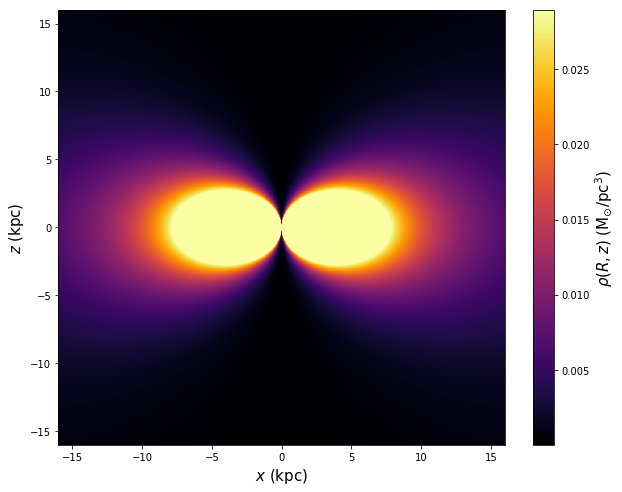

In [6]:
df = toomredf(ro=8., vo=220.)
R = np.linspace(-2,2,1000)*8
z = np.linspace(-2,2,1000)*8
Rs, zs = np.meshgrid(R, z)
vals = df.density_cyl(Rs, zs)
plt.figure(figsize=(10,8))
plt.imshow(vals, cmap='inferno', aspect='auto', vmax=np.mean(vals)+0.001*np.std(vals),
           extent=[np.min(R), np.max(R), np.min(z), np.max(z)])
cbar = plt.colorbar()
cbar.set_label(r'$\rho(R, z)$ $(\mathrm{M}_{\odot}/\mathrm{pc}^{3})$', fontsize=15,)
plt.xlabel(r'$x$ (kpc)', fontsize=15)
plt.ylabel(r'$z$ (kpc)', fontsize=15)
plt.show()

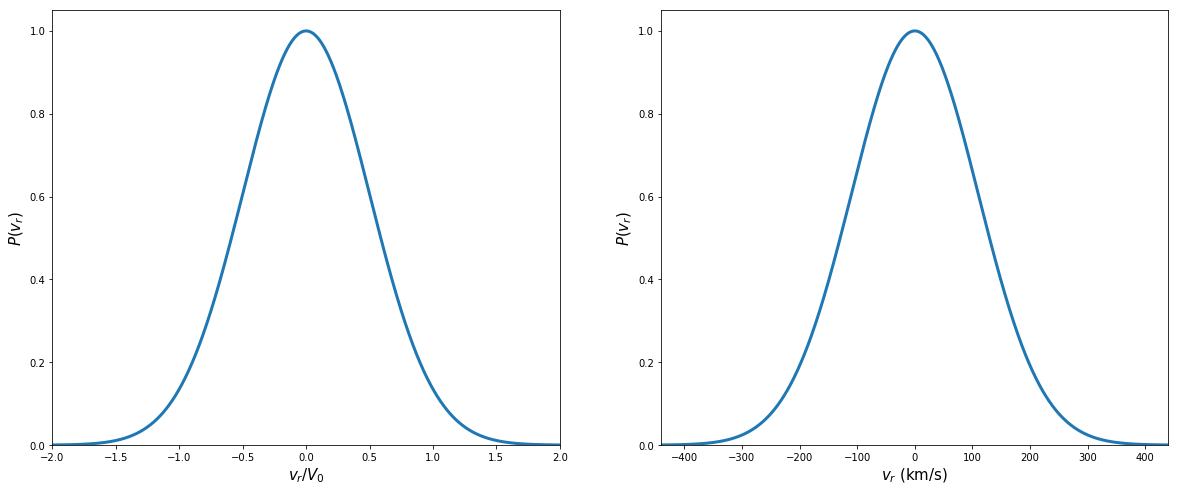

In [7]:
df = toomredf()
fig, axes = plt.subplots(1,2,figsize=(20,8))
vr = np.linspace(-2,2,1000)
axes[0].plot(vr, df.pvr(vr), linewidth=3)
axes[0].set_xlabel(r'$v_r/V_0$', fontsize=15)
axes[0].set_ylabel(r'$P(v_r)$', fontsize=15)
axes[0].set_xlim((-2,2))
axes[0].set_ylim(0)
axes[1].plot(vr*220, df.pvr(vr*220, use_physical=True), linewidth=3)
axes[1].set_xlabel(r'$v_r$ (km/s)', fontsize=15)
axes[1].set_ylabel(r'$P(v_r)$', fontsize=15)
axes[1].set_xlim((-440,440))
axes[1].set_ylim(0)
plt.show()

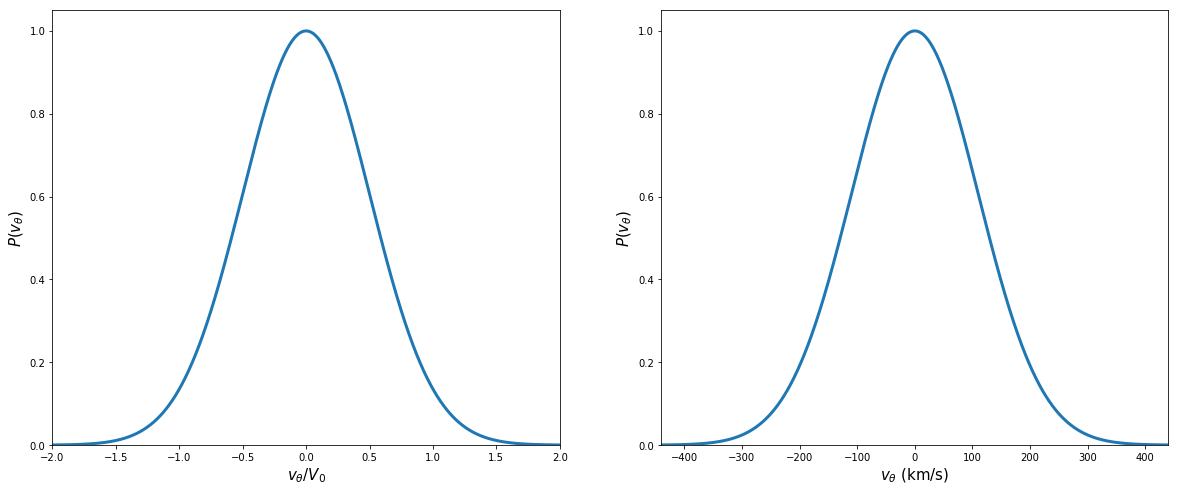

In [8]:
df = toomredf()
fig, axes = plt.subplots(1,2,figsize=(20,8))
vtheta = np.linspace(-2,2,1000)
axes[0].plot(vtheta, df.pvtheta(vtheta), linewidth=3)
axes[0].set_xlabel(r'$v_\theta/V_0$', fontsize=15)
axes[0].set_ylabel(r'$P(v_\theta)$', fontsize=15)
axes[0].set_xlim((-2,2))
axes[0].set_ylim(0)
axes[1].plot(vr*220, df.pvtheta(vtheta*220, use_physical=True), linewidth=3)
axes[1].set_xlabel(r'$v_\theta$ (km/s)', fontsize=15)
axes[1].set_ylabel(r'$P(v_\theta)$', fontsize=15)
axes[1].set_xlim((-440,440))
axes[1].set_ylim(0)
plt.show()

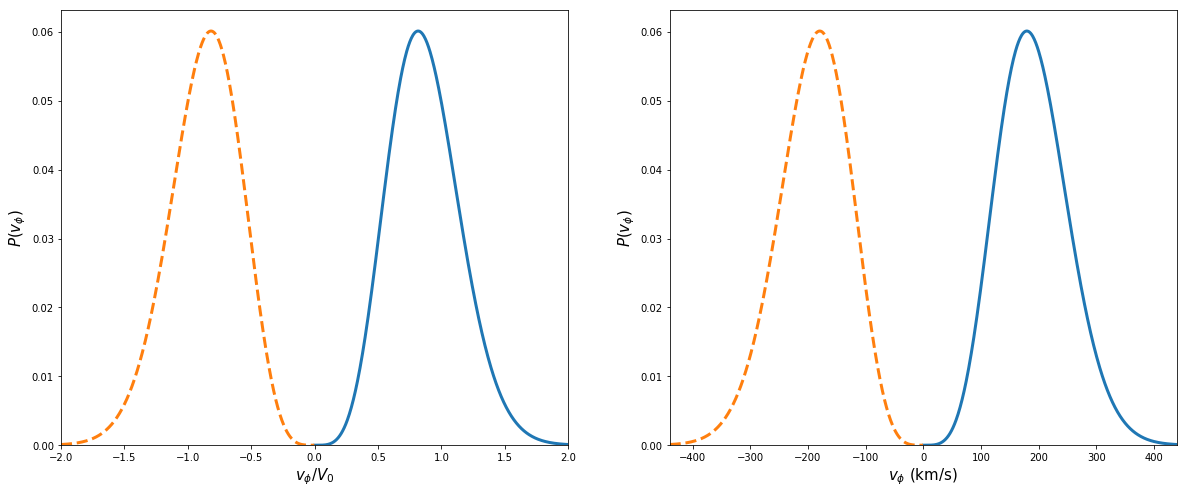

In [9]:
df = toomredf(2)
vphi = np.linspace(-2,2,1000)
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes[0].plot(vphi[vphi>=0], df.pvphi(vphi[vphi>=0]), linewidth=3)
axes[0].plot(vphi[vphi<=0], df.pvphi(vphi[vphi<=0]), linestyle='--', linewidth=3)
axes[0].set_xlabel(r'$v_\phi/V_0$', fontsize=15)
axes[0].set_ylabel(r'$P(v_\phi)$', fontsize=15)
axes[0].set_xlim((-2,2))
axes[0].set_ylim(0)
axes[1].plot(vphi[vphi>=0]*220, df.pvphi(vphi[vphi>=0]*220, use_physical=True), linewidth=3)
axes[1].plot(vphi[vphi<=0]*220, df.pvphi(vphi[vphi<=0]*220, use_physical=True), linestyle='--', linewidth=3)
axes[1].set_xlabel(r'$v_\phi$ (km/s)', fontsize=15)
axes[1].set_ylabel(r'$P(v_\phi)$', fontsize=15)
axes[1].set_xlim((-440,440))
axes[1].set_ylim(0)
plt.show()